# Introduction
Generally unsupervised machine learning techniques are used to work with unlabeled data. For exploratory purposes, we are going to use these techniques with labeled data. Farther down, we will use the simplistic, albeit, effective K-Means clustering method in conjunction with supervised machine learning techniques in order to print out confusion matrices to output information about how effective our predictions were.

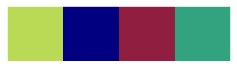

In [278]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

import numpy as np
import os
import pandas as pd
# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
# set style of plots
sns.set_style('dark')

#define a custom palette
customPalette = ['#bada55', '#000080', '#901e40', '#33a27f']
sns.set_palette(customPalette)
sns.palplot(customPalette)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Import Spotify data
We extracted thousands of songs using Spotipy, a library that leverages the Spotify API, to inspect song features and artist data for the vast database of songs that Spotify houses. Now, let's import that data and explore it.

In [279]:
songs = pd.read_csv("deduplicated_tracks_from_my_playlists.csv", encoding = "latin-1")

After importing the data, be sure to confirm that the import was successful by looking at the dataframe overview (info) and top 5 rows of observations (head)

In [280]:
songs.info()
songs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2918 entries, 0 to 2917
Data columns (total 18 columns):
added_at            2918 non-null object
name                2918 non-null object
artist              2918 non-null object
id                  2918 non-null object
popularity          2918 non-null int64
danceability        2918 non-null float64
energy              2918 non-null float64
loudness            2918 non-null float64
speechiness         2918 non-null float64
acousticness        2918 non-null float64
tempo               2918 non-null float64
liveness            2918 non-null float64
valence             2918 non-null float64
instrumentalness    2918 non-null float64
key                 2918 non-null int64
time_signature      2918 non-null int64
mode                2918 non-null int64
duration_ms         2918 non-null int64
dtypes: float64(9), int64(5), object(4)
memory usage: 410.5+ KB


,added_at,name,artist,id,popularity,danceability,energy,loudness,speechiness,acousticness,tempo,liveness,valence,instrumentalness,key,time_signature,mode,duration_ms
0,2020-03-03T16:47:17Z,Saturdays (feat. HAIM),Twin Shadow,5ClqcvP4dYDDX6Zv3jPQD1,60,0.470,0.696,-4.749,0.1040,0.06590,169.976,0.0962,0.8020,0.000039,9,4,1,205442
1,2020-03-03T16:47:17Z,Saint,Blood Orange,2PzWUwFXApjQBZzKMl4Hd6,56,0.795,0.629,-8.704,0.0745,0.04300,100.803,0.3780,0.0667,0.000154,5,4,0,192010
2,2020-03-03T16:47:17Z,Everyone Acts Crazy Nowadays,Unknown Mortal Orchestra,6VPvz8SZWRFEoawyUTvQTt,51,0.816,0.755,-4.942,0.0828,0.47300,120.008,0.1780,0.7350,0.000003,8,4,1,254973
3,2020-03-03T16:47:17Z,Less Is More,Choices,7MWJzAWFWT1ZSvf3D2dQrG,30,0.831,0.808,-5.002,0.0604,0.00635,121.994,0.2030,0.4900,0.314000,2,4,1,314754
4,2020-03-03T16:47:17Z,Springtime,Ivana Parnasso,13FRCyzRG702n4PBpl0sot,2,0.792,0.577,-8.826,0.1160,0.16300,89.954,0.0476,0.6950,0.010300,1,4,1,268412


We can use describe() to output statistics about the numerical information contained within the dataframe

In [281]:
songs.describe()

,popularity,danceability,energy,loudness,speechiness,acousticness,tempo,liveness,valence,instrumentalness,key,time_signature,mode,duration_ms
count,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2.918000e+03
mean,36.180946,0.594897,0.614839,-8.310820,0.073753,0.269307,119.051086,0.180449,0.476206,0.128008,5.200480,3.925977,0.622344,2.475762e+05
std,22.914415,0.162993,0.214534,3.895897,0.083081,0.298538,27.216910,0.149654,0.246041,0.262880,3.582024,0.360936,0.484884,8.580904e+04
min,0.000000,0.000000,0.000076,-37.264000,0.000000,0.000004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.480000e+03
25%,17.000000,0.492000,0.474000,-9.862750,0.034400,0.025400,99.935500,0.093925,0.278000,0.000004,2.000000,4.000000,0.000000,2.005045e+05
50%,40.000000,0.611000,0.640000,-7.518000,0.043800,0.134000,117.688000,0.121000,0.473000,0.000649,5.000000,4.000000,1.000000,2.324730e+05
75%,54.000000,0.711000,0.782000,-5.734250,0.072200,0.463750,133.969000,0.218000,0.670750,0.063000,8.000000,4.000000,1.000000,2.760768e+05
max,91.000000,0.975000,0.998000,1.342000,0.958000,0.996000,216.101000,0.974000,1.000000,0.992000,11.000000,5.000000,1.000000,1.395733e+06


# Preprocessing and scaling
Before continuing with our exploration, let's normalize any data that isn't already measured between a value of 0 and 1 by using scikit learn's preprocessing methods:<br>
- The loudness feature is from -60db to 0 so we will normalise this column between 0 and 1.
- The tempo feature is in BPM so we will scale between 0 and 1 as well.

In [282]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler(feature_range=[0, 1])

loudness = songs[['loudness']].values
loudness_scaled = scaler.fit_transform(loudness)
songs['loudness'] = pd.DataFrame(loudness_scaled)

tempo = songs[['tempo']].values
tempo_scaled = scaler.fit_transform(tempo)
songs['tempo'] = pd.DataFrame(tempo_scaled)

Be sure to check that the loudness and tempo are scaled (we'll trust sklearn that the values are scaled correctly)

In [283]:
songs.describe()

,popularity,danceability,energy,loudness,speechiness,acousticness,tempo,liveness,valence,instrumentalness,key,time_signature,mode,duration_ms
count,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2.918000e+03
mean,36.180946,0.594897,0.614839,0.749966,0.073753,0.269307,0.550905,0.180449,0.476206,0.128008,5.200480,3.925977,0.622344,2.475762e+05
std,22.914415,0.162993,0.214534,0.100914,0.083081,0.298538,0.125945,0.149654,0.246041,0.262880,3.582024,0.360936,0.484884,8.580904e+04
min,0.000000,0.000000,0.000076,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.480000e+03
25%,17.000000,0.492000,0.474000,0.709767,0.034400,0.025400,0.462448,0.093925,0.278000,0.000004,2.000000,4.000000,0.000000,2.005045e+05
50%,40.000000,0.611000,0.640000,0.770502,0.043800,0.134000,0.544597,0.121000,0.473000,0.000649,5.000000,4.000000,1.000000,2.324730e+05
75%,54.000000,0.711000,0.782000,0.816706,0.072200,0.463750,0.619937,0.218000,0.670750,0.063000,8.000000,4.000000,1.000000,2.760768e+05
max,91.000000,0.975000,0.998000,1.000000,0.958000,0.996000,1.000000,0.974000,1.000000,0.992000,11.000000,5.000000,1.000000,1.395733e+06


# Histogram
Move over Instagram, it's histogram time!<br>
Histograms or bar charts as they are colloquially referred to grant us an incredible overview of our song selection. We can see at a high level the features that are contained in this song dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E939D47B48>,
      dtype=object)

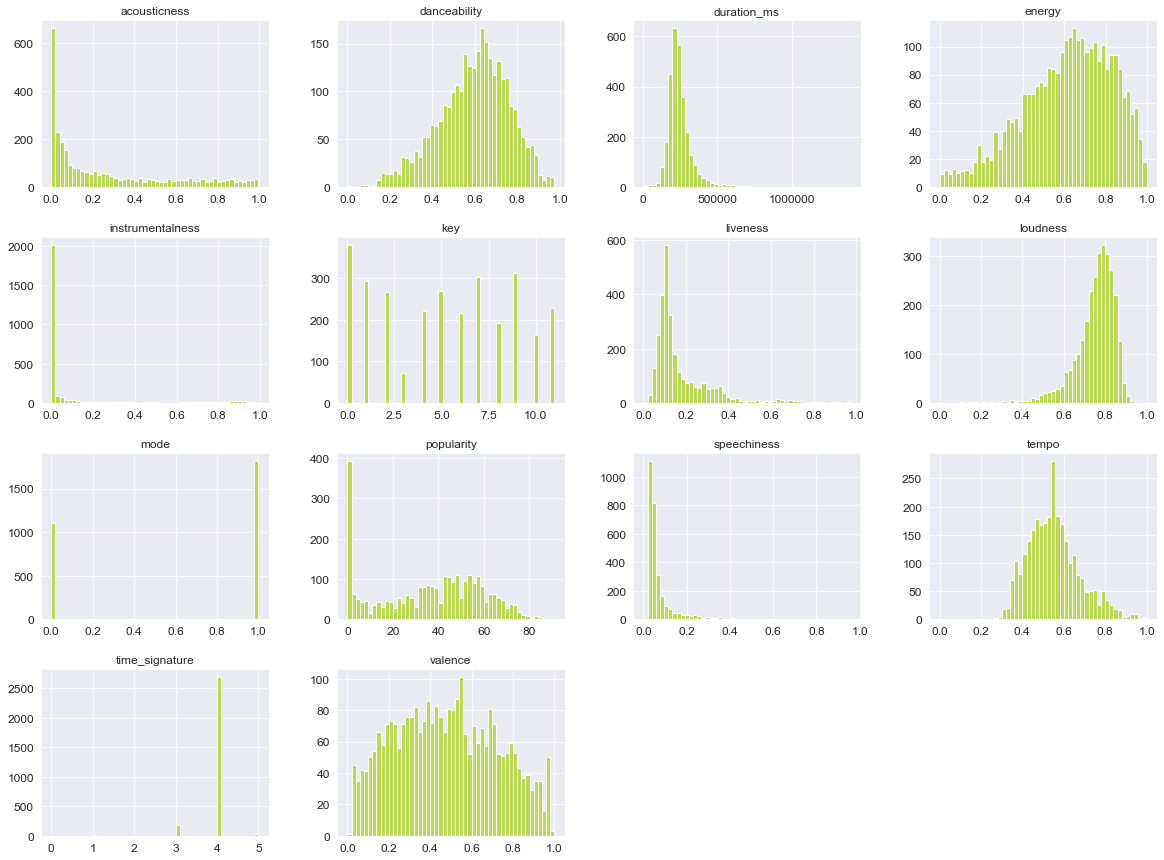

In [284]:
songs.hist(bins=50,figsize=(20,15))

From the above histogram we can extract the following observations about our dataset:<br>
- acousticness: most of the songs are low on acousticness
- danceability: we could probably dance to many of these songs
- duration_ms: thankfully, all of the songs are mostly the same length. Wouldn't want our music to last forever now would we?
- energy: many of the songs are highly energetic, this makes sense, I don't know many people who enjoy constant slow, droning music. Me included.
- instrumentalness: this is strange, most of the songs are low on "instrumentalness", we'll dig into Spotify's definition of this term for further insight as we proceed into our exploration
- key: interesting, we have a nice mix of "keys" in our song selection
- liveness: this makes sense, I don't listen to a lot of live music, so the majority of the songs range in more-than-likely "studio setting" value levels
- loudness: I don't particularly like loud music, so I am not sure how to interpret this. We'll reference Spotify's definition of "loudness" for additional insight
- mode: there are only two modes, and we can see that I like more songs with a higher mode
- popularity: eesh, apparently my song taste drift towards the less popular songs
- speechiness: good to know, most of the songs I like are sung, not said
- tempo: most of the songs I like have an average tempo
- time_signature: I am no music expert, but 4:4 time signature is the most widely used time signature
- valence: how "positive" a song sounds. The word "valence" also has something to do with electrons so that intrigues me. Anyway, this is all over the map. Interesting!

Now let's copy our song dataset, and keep only the Spotify song features. One could argue that we should include features such as 'key' and 'time_signature' but I'd like to only explore the Spotify specific song features and exclude song features that are sonically standard. We'll also remove popularity. Recall above that I like less popular music. I don't want this to influence my clusters.

In [285]:
songs_features = songs.copy()
songs_features = songs_features.drop(['added_at', 
                                      'name', 
                                      'artist', 
                                      'id', 
                                      'key', 
                                      'time_signature', 
                                      'mode', 
                                      'popularity', 
                                      'duration_ms'], axis = 1)

songs_features.head()

,danceability,energy,loudness,speechiness,acousticness,tempo,liveness,valence,instrumentalness
0,0.470,0.696,0.842227,0.1040,0.06590,0.786558,0.0962,0.8020,0.000039
1,0.795,0.629,0.739781,0.0745,0.04300,0.466462,0.3780,0.0667,0.000154
2,0.816,0.755,0.837227,0.0828,0.47300,0.555333,0.1780,0.7350,0.000003
3,0.831,0.808,0.835673,0.0604,0.00635,0.564523,0.2030,0.4900,0.314000
4,0.792,0.577,0.736621,0.1160,0.16300,0.416259,0.0476,0.6950,0.010300


# EDA
Now that pre-processing is complete, let's explore the data! We'll start with a very straight forward Principal Component Analysis to choose a target number of clusters to use for the various unsupervise algorithms that exist.<br>

## Principal Component Analysis PCA
Principal Component Analysis is a re-occurring theme in unsupervised learning. PCA acts as a sort of pre-cursor for several other unsupervised learning techniques. We'll use it independently below and as a pre-requisite for other techniques.<br>
For the initial PCA, I used this tutorial to output this plot:<br>
https://towardsdatascience.com/an-approach-to-choosing-the-number-of-components-in-a-principal-component-analysis-pca-3b9f3d6e73fe<br>
We will not pass any parameters into PCA() for this use of the function. The plot, therefore, will output the default number of components (9). I cannot input an n_components value greater than 9 because I only have 9 components to reduce.<br>
Additional information on parameters for PCA() can be found here:<br>
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

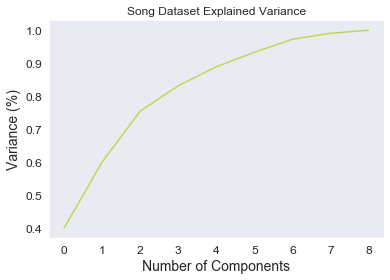

In [286]:
pca = PCA().fit(songs_features)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Song Dataset Explained Variance')
plt.show()

In [287]:
print(pca.explained_variance_ratio_.cumsum())

[0.3996506  0.60015744 0.75449185 0.83146819 0.8892751  0.93310375
 0.9725567  0.99077429 1.        ]


The explained variance describes how much information (variance) can be attributed to each of the principal components. By looking at the cumulative sum of explained_variance_ratio_, we can see that 6 clusters will explain 97% of the variation that exists in our song data. We will update our pca variable to account for these six clusters and then output the relationships between the song features for each component.

In [288]:
pca = PCA(n_components = 6).fit(songs_features)
print (pd.DataFrame(pca.components_, columns=songs_features.columns, index = ['PC-1','PC-2', 'PC-3', 'PC-4', 'PC-5', 'PC-6']))

      danceability    energy  loudness  speechiness  acousticness     tempo  \
PC-1     -0.172169 -0.483990 -0.194268    -0.013608      0.716620 -0.064148   
PC-2     -0.098936  0.121665 -0.033206    -0.044422     -0.312798  0.043185   
PC-3      0.324476 -0.077197 -0.079593     0.024696      0.320665 -0.031396   
PC-4     -0.500005  0.441769  0.103851     0.025844      0.335464  0.185342   
PC-5      0.445361 -0.222885 -0.059222     0.130611     -0.118650 -0.378230   
PC-6     -0.368202 -0.604607 -0.293866    -0.018743     -0.374640  0.393510   

      liveness   valence  instrumentalness  
PC-1 -0.046462 -0.376828          0.190707  
PC-2  0.002955 -0.237715          0.903387  
PC-3 -0.060724  0.799601          0.367356  
PC-4  0.608676  0.156871          0.037416  
PC-5  0.745674 -0.133176          0.022553  
PC-6  0.208259  0.266694         -0.049655  


## Elbow Method for Optimal k
Now let's use the Elbow Method to find an optimal cluster number. We'll set a range between 1 and 15. I suspect that we won't need more than 10 clusters, but it will be cool to see the curve that develops.

In [289]:
from sklearn.cluster import KMeans

sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(songs_features)
    sum_of_squared_distances.append(km.inertia_)

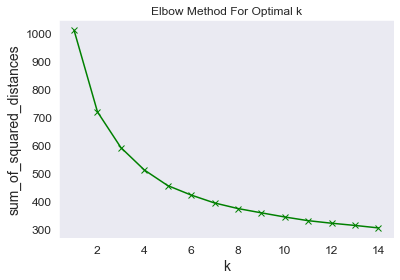

In [290]:
plt.plot(K, sum_of_squared_distances, 'gx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

The elbow method returned what almost looks like the inverse of the Explained Variance plot seen above! The plot begins to flatten out significantly after k = 6. This infers that 6 is a good number of clusters to illustrate for this dataset.

# Silhouette Score
The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.
Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

I am calculating this to get a feel for using the silhouette score and because I am interested to see how many of my clusters will overlap. As long as I don't receive a negative number, I will be satisfied. I won't be too alarmed if the number is close to 0. With a finite set of song features, I can anticipate that there may be some clusters that overlap.

In [291]:
from sklearn.metrics import silhouette_score
for n_clusters in range(1, 7):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(songs_features)
    centers = clusterer.cluster_centers_
    # print('cluster:', clusterer)
    # print('preds:', preds)
    # print('centers:', centers)

In [292]:
score = silhouette_score(songs_features, preds, metric='euclidean')
print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 6, silhouette score is 0.20036129204671668)


# K-Means Clustering

The idea of K-Means clustering befuddled me for longer than it should have. However, I found a nice tutorial that boiled an explanation down to two bulletpoints. If the author is accurate, then from now on I will look really smart when I explain data to people.<br>
Citation: https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html<br>
K-Means stands as a sort of foundation when using unsupervised learning algorithms. From the above site, there are two principal components (see what I did there) that a data engineer needs to keep in mind:
- The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
- Each point is closer to its own cluster center than to other cluster centers.

In [293]:
kmeans = KMeans(n_clusters = 6)
kmeans.fit(songs_features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

We're using PCA here because we want a simple 2D representation. For this exploration, I find very little benefit to using a 3D model other than that it will look "cooler". Note that "n_components" will be equal to "2". That's the 2 dimensions I am referring to.

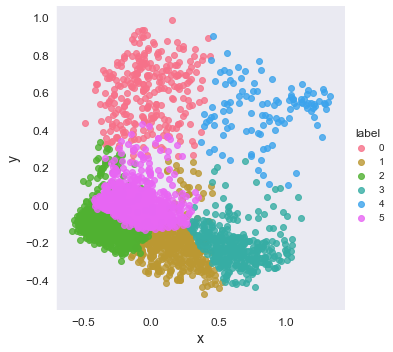

In [294]:
from sklearn.decomposition import PCA
y_kmeans = kmeans.predict(songs_features)
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(songs_features)

pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

cluster = sns.lmplot(data = pc, x = 'x', y = 'y', hue = 'label', 
                   fit_reg = False, legend = True, legend_out=True)

# T-Distributed Stochastic Neighbor Embedding (T-DSNE)
T-Distributed Stochastic Neighbor Embedding aka T-DSNE is another technique for clustering data. Keep in mind that T-DSNE is computationally intensive to use on high dimensional datasets. Therefore, it is generally good to reduce the number of dimensions before executing a T-DSNE regression<br>
Source:<br>
https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

We're going to leverage the y_kmeans object that we declared above in order to perform the "pre-dimensional reduction" before running this dimensional reduction.<br>
We will again represent our data in 2D (note the re-appearance of n_components) We could probably increase the dimensional representation, but we won't because we want to keep our exploration simple.

In [295]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, perplexity = 50)

tsne_components = tsne.fit_transform(songs_features)

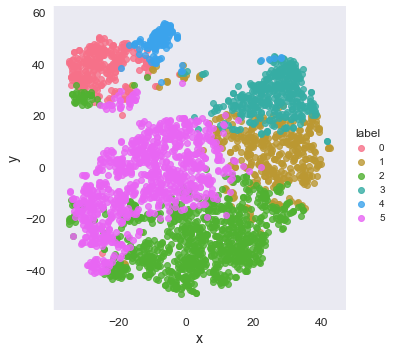

In [296]:
ts = pd.DataFrame(tsne_components)
ts['label'] = y_kmeans
ts.columns = ['x', 'y','label']

cluster = sns.lmplot(data=ts, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

# Density-based spatial clustering (DBSCAN)
We can also cluster using DBSCAN. Also known as density-based spatial clustering, a user does not need to explicitly input a number of clusters when leveraging this clustering algorithm. However, when using this algorithm in Python - specifically sklearn, there are two parameters that should be used to tune the output:<br>
- 'eps' is the 'maximum distance between two data points to be considered in the same neighborhood'
- 'min_samples' is the 'minimum amount of data points in a neighborhood to be considered a cluster.'

They both have defaults but since datasets vary, it's important to tune them based on your specific dataset.<br>

I chose to use '0.3' and '10' respectively as these are the values that are seen in an example from:<br>
https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html

Even though an explicit cluster number is not needed for this method, I set one anyway when declaring my 'pca' variable for this method. Below, we can see the index of PCA-related values that are printed with this option set.<br>


I ended up using the following tutorial in order to graph a representation of what this looks like.<br>
With some assistance from: https://builtin.com/data-science/unsupervised-learning-python

In [297]:
from sklearn.cluster import DBSCAN

# Declaring Model
dbscan = DBSCAN(eps=0.3, min_samples=10)

# Fitting
dbscan.fit(songs_features)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

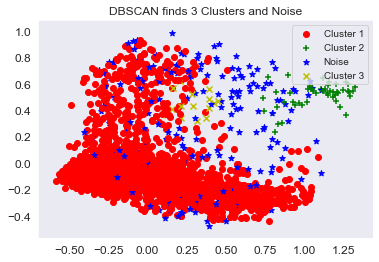

In [298]:
# Transforming Using PCA
pca = PCA().fit(songs_features)
pca_2d = pca.transform(songs_features)

# Plot based on Class
for i in range(0, pca_2d.shape[0]):
    # print(dbscan.labels_[i])
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='o')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='+')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')
    elif dbscan.labels_[i] == 2:
        c4 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='y', marker='x')

plt.legend([c1, c2, c3, c4], ['Cluster 1', 'Cluster 2', 'Noise', 'Cluster 3'])
plt.title('DBSCAN finds 3 Clusters and Noise')
plt.show()

## Now let's explore the clusters and see what songs they contain
After our dimensionality reduction, and having experimented with a couple of different clustering methods. We can continue our exploration using the K-Means clustering method invoked a bit earlier. The reason we use K-Means is due to the fact that PCA, T-DSNE, and DBSCAN obfuscate the data which makes it difficult to how the songs are clustered.<br>
This is an important point to make, because later on when we use supervised machine learning techniques, we end up using K-Means over other unsupervised models. We can "get away with this" because our data is labeled - very clearly I might add. K-Means is a very simplistic technique and retains most of the original data.

In [301]:
songs['label'] = y_kmeans

# shuffle dataset

songs = songs.sample(frac=1)
songs['label'].value_counts()

5    888
2    863
1    410
3    363
0    280
4    114
Name: label, dtype: int64

In [302]:
songs[songs['label'] == 0].head(40)

,added_at,name,artist,id,popularity,danceability,energy,loudness,speechiness,acousticness,tempo,liveness,valence,instrumentalness,key,time_signature,mode,duration_ms,label
1889,2017-07-29T22:30:01Z,Ramblin' Man,The Allman Brothers Band,2Q7LpkYrS0PBpoq3iCqypa,14,0.309,0.83100,0.750557,0.0360,0.488000,0.838242,0.2860,0.9340,0.003040,1,4,1,288160,0
892,2019-04-13T21:50:25Z,Resist,Femina,0iVXHdpgn6ZtxYhm0cDR5A,20,0.813,0.61800,0.712040,0.0833,0.484000,0.499780,0.0853,0.1560,0.438000,0,4,1,267188,0
1711,2017-11-10T10:27:07Z,"Anything Goes - (From ""Anything Goes"")",Cole Porter,1MoF2Agl5fwTlSJxG305xT,43,0.802,0.23000,0.621406,0.0879,0.964000,0.489924,0.1150,0.5560,0.000000,0,3,0,184493,0
875,2019-04-13T21:50:25Z,Drown,Karen O,6GdesCf6pwGGTWIsa9RWHB,37,0.572,0.42600,0.666917,0.0304,0.666000,0.578382,0.1240,0.4550,0.049600,10,4,0,206427,0
2544,2016-10-13T01:09:17Z,Dead End Love,XYLÃ,7K0ylg8TRmJavlgCS1zhL4,25,0.589,0.76500,0.816168,0.0351,0.021000,0.703180,0.1990,0.6670,0.000079,6,4,0,227766,0
2141,2017-04-07T07:16:42Z,Roll The Bones - Audiotree Live Version,Shakey Graves,1Yxbxg5R6dQcYmOdjvlXP0,58,0.597,0.54900,0.699658,0.0586,0.651000,0.568257,0.0991,0.2040,0.000015,1,4,1,291596,0
1918,2017-07-04T05:04:18Z,Islands,Rynn,0IG0bhR18uNnfSa6nS0r0h,39,0.602,0.61400,0.808320,0.0633,0.626000,0.638553,0.0738,0.3330,0.021000,11,4,0,226063,0
957,2019-03-07T09:23:59Z,Go DJ,Lil Wayne,4svCVV4VHEL3Z4efES868h,57,0.729,0.79200,0.883982,0.1420,0.061700,0.731107,0.2230,0.6980,0.000000,6,4,1,281827,0
1362,2018-04-05T05:54:32Z,Blue in Green,Miles Davis,0aWMVrwxPNYkKmFthzmpRi,63,0.421,0.01610,0.308398,0.0374,0.810000,0.513306,0.0978,0.1600,0.002100,2,4,0,337733,0
344,2019-11-27T09:33:47Z,Sound and Vision - 2017 Remaster,David Bowie,1vP2JEXRsGrFbwOZ0foOQ5,60,0.667,0.80400,0.742916,0.0398,0.032800,0.489572,0.0632,0.7590,0.054400,2,4,1,184382,0


In [303]:
songs[songs['label']==0].mean()

popularity              35.728571
danceability             0.578461
energy                   0.612344
loudness                 0.748160
speechiness              0.075789
acousticness             0.279836
tempo                    0.558480
liveness                 0.182235
valence                  0.468858
instrumentalness         0.129910
key                      4.700000
time_signature           3.914286
mode                     0.614286
duration_ms         241528.950000
label                    0.000000
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E944069BC8>,
      dtype=object)

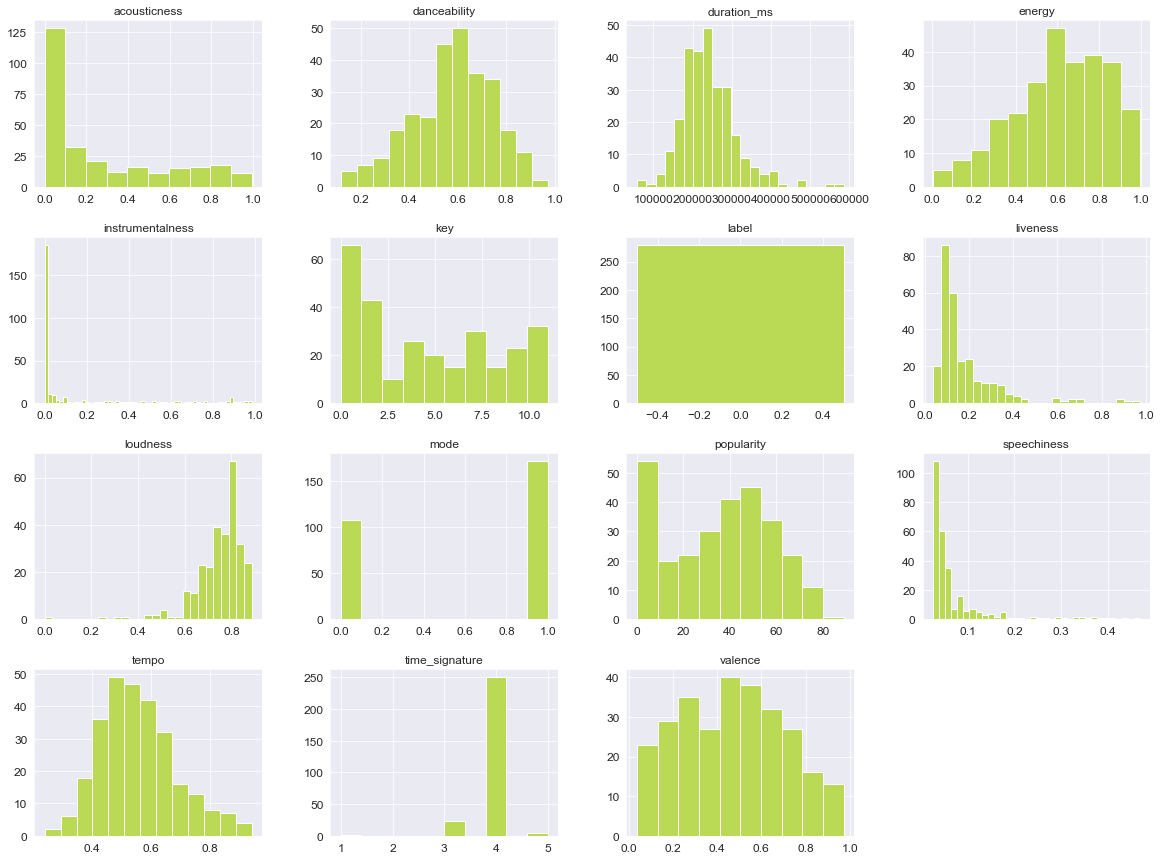

In [304]:
songs[songs['label']==0].hist(bins = 'auto', figsize=(20,15))

In [305]:
songs[songs['label']==1].head(40)

,added_at,name,artist,id,popularity,danceability,energy,loudness,speechiness,acousticness,tempo,liveness,valence,instrumentalness,key,time_signature,mode,duration_ms,label
273,2019-12-12T22:29:04Z,Livin' My Best Life,A Thousand Horses,23dyF3k9LfRnG7rRIWWYJs,43,0.578,0.9480,0.874942,0.0407,0.000963,0.536559,0.2890,0.7510,0.015000,7,4,1,185191,1
311,2019-11-27T09:33:47Z,Gravity Rides Everything,Modest Mouse,1pPqVrG2RCHXx81Aw4xp99,54,0.395,0.4430,0.758742,0.0396,0.431000,0.477841,0.5040,0.7140,0.035200,4,4,1,259840,1
1705,2017-11-10T10:27:07Z,Wolf Like Me,TV On The Radio,03wKMRNYVvw6s9nm4I4jUS,58,0.363,0.7870,0.833886,0.0429,0.001770,0.814059,0.5310,0.2010,0.004460,7,4,1,279293,1
1139,2018-12-07T06:08:13Z,You've Got Mail,Zapp,4DydEVkRQPRhidzoTARaK6,19,0.787,0.3950,0.751541,0.0319,0.544000,0.582829,0.2280,0.4290,0.000000,1,4,0,255027,1
2301,2016-12-29T18:35:32Z,Ride,Lana Del Rey,3l2S2RkGG4lbh7WqmCV3NB,53,0.373,0.6860,0.822256,0.0340,0.128000,0.433885,0.3830,0.1890,0.000002,0,4,1,289080,1
1829,2017-08-05T21:00:10Z,Comfort Zone,Henry Hall,3mcxGJmeXF9fA5iUMxhOGL,30,0.522,0.8690,0.794954,0.0512,0.004220,0.569340,0.2670,0.6340,0.000003,10,4,1,176847,1
291,2019-12-12T22:29:04Z,On Her Majesty's Secret Service (feat. Propell...,David Arnold,6aZvsp5k5RyfZcbD0Y8ZXH,41,0.630,0.9290,0.717842,0.0561,0.000164,0.559382,0.3190,0.1130,0.888000,1,4,0,565293,1
1580,2018-01-07T10:20:20Z,Animal Kingdumb,Netherfriends,0XDqW29d0CgqxPH7WG7uw1,1,0.465,0.8650,0.867404,0.0607,0.003530,0.637892,0.2530,0.4570,0.014500,10,4,0,278249,1
871,2019-04-13T21:50:25Z,Controversy,Prince,5shPZ6RnC6sCm0iSZiv7wU,51,0.852,0.3210,0.521292,0.0527,0.009960,0.552418,0.0684,0.6290,0.239000,1,4,0,435333,1
2051,2017-05-18T15:17:48Z,Limestone,Magic City Hippies,00HIh9mVUQQAycsQiciWsh,57,0.706,0.4570,0.722815,0.0383,0.282000,0.361007,0.0614,0.7230,0.008490,4,4,1,209165,1


In [306]:
songs[songs['label']==1].mean()

popularity              34.975610
danceability             0.608418
energy                   0.637995
loudness                 0.760347
speechiness              0.075105
acousticness             0.228064
tempo                    0.551620
liveness                 0.178328
valence                  0.509730
instrumentalness         0.114887
key                      5.275610
time_signature           3.965854
mode                     0.624390
duration_ms         248112.043902
label                    1.000000
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E944EDC808>,
      dtype=object)

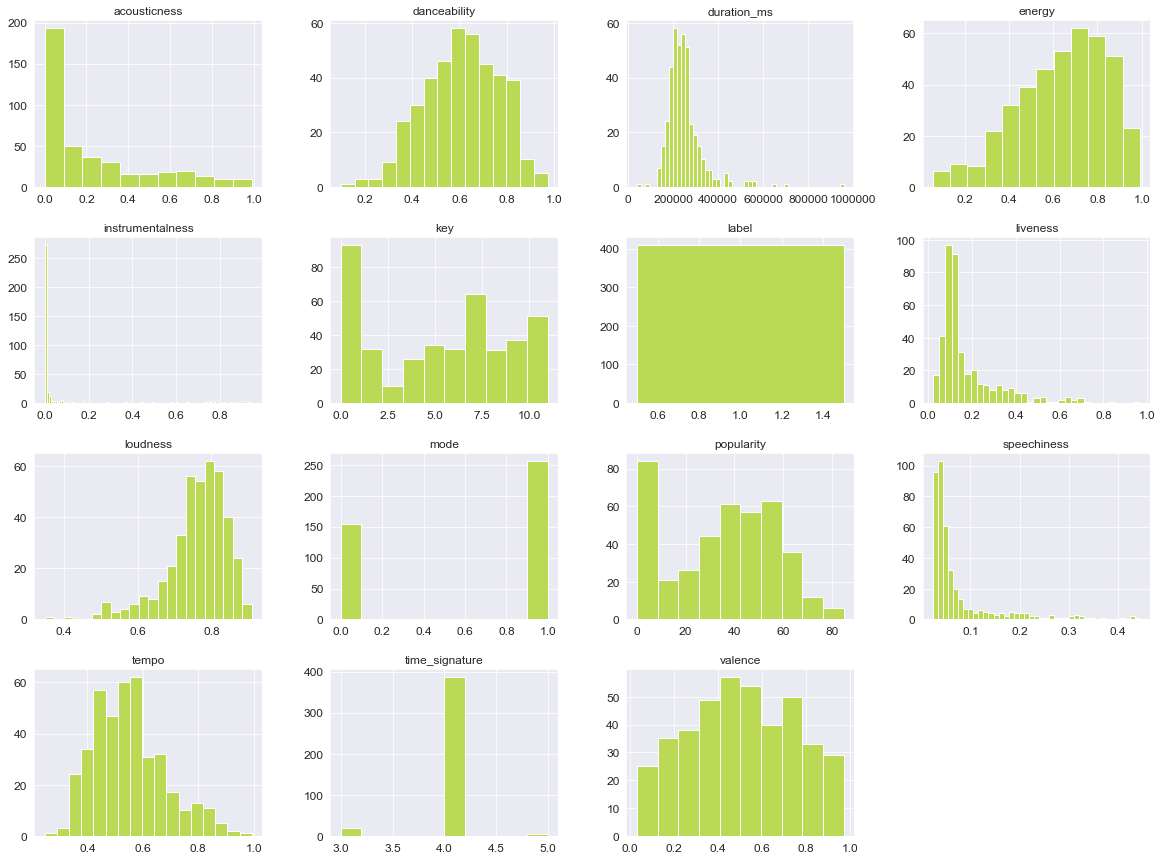

In [307]:
songs[songs['label']==1].hist(bins = 'auto', figsize=(20,15))

In [308]:
songs[songs['label']==2].head(40)

,added_at,name,artist,id,popularity,danceability,energy,loudness,speechiness,acousticness,tempo,liveness,valence,instrumentalness,key,time_signature,mode,duration_ms,label
741,2019-05-31T17:51:36Z,Under The Sheets,Ellie Goulding,5qMINSAW82yP7IRW918rcE,38,0.615,0.750,0.815858,0.0281,0.011000,0.471798,0.3600,0.4920,0.000004,9,4,0,224453,2
1291,2018-06-22T04:10:06Z,The Fresh Prince of Bel-Air,DJ Jazzy Jeff & The Fresh Prince,0UREO3QWbXJW3gOUXpK1am,63,0.824,0.684,0.774750,0.0935,0.002780,0.468077,0.0481,0.8700,0.000001,10,4,0,177267,2
2890,2016-05-09T20:31:18Z,Love Me In Whatever Way,James Blake,1C0WuqxJFwspf1lc0v4qhZ,44,0.318,0.482,0.662773,0.1080,0.861000,0.571441,0.1850,0.2360,0.004520,8,4,0,303463,2
654,2019-08-01T05:15:00Z,"Caroline, No - Remastered",The Beach Boys,5RSQKtG1KNwrzFMEePpjt6,46,0.402,0.426,0.714967,0.0262,0.775000,0.351067,0.1750,0.6410,0.000006,10,4,0,173933,2
876,2019-04-13T21:50:25Z,Human,The Human League,537yo062QIz16oQOgxmul3,42,0.625,0.572,0.729653,0.0251,0.049000,0.469017,0.0939,0.3600,0.001510,8,4,1,265320,2
2234,2017-01-14T10:37:43Z,Bad Words,Tobias Jesso Jr.,1QDSakwsFpho9Ezl4c2IUU,21,0.693,0.241,0.666891,0.0398,0.884000,0.501409,0.0852,0.1240,0.646000,0,3,1,268093,2
1799,2017-09-10T04:50:08Z,Negative Space,Alex Frankel,7HnchKYj7p3nZpGxQiywQ4,34,0.760,0.649,0.781821,0.0429,0.072000,0.481085,0.0748,0.7140,0.013100,5,4,0,238927,2
742,2019-05-31T17:51:36Z,Starry Eyed,Ellie Goulding,14OF4JQOIm4hb0GfG5nfyF,55,0.504,0.814,0.826763,0.0389,0.135000,0.693967,0.3240,0.5960,0.000014,5,4,0,176613,2
217,2020-01-04T16:45:38Z,Faith (with Dolly Parton) [feat. Mr. Probz] - ...,Galantis,4D09e1TfOMbuMadTLcl1P6,52,0.557,0.518,0.782806,0.0315,0.339000,0.510368,0.0867,0.3540,0.000000,7,4,1,173218,2
17,2020-03-03T16:47:17Z,Deus Me DÃª Grana,Dead Combo,3ekmw2F2mv2FZzNa7TzTto,30,0.405,0.636,0.694244,0.0409,0.204000,0.439697,0.1120,0.4900,0.915000,10,3,0,221499,2


In [309]:
songs[songs['label']==2].mean()

popularity              36.091541
danceability             0.605536
energy                   0.612697
loudness                 0.750944
speechiness              0.070868
acousticness             0.271034
tempo                    0.545273
liveness                 0.177160
valence                  0.481007
instrumentalness         0.125039
key                      5.266512
time_signature           3.923523
mode                     0.611819
duration_ms         247966.157590
label                    2.000000
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E945BCFD88>,
      dtype=object)

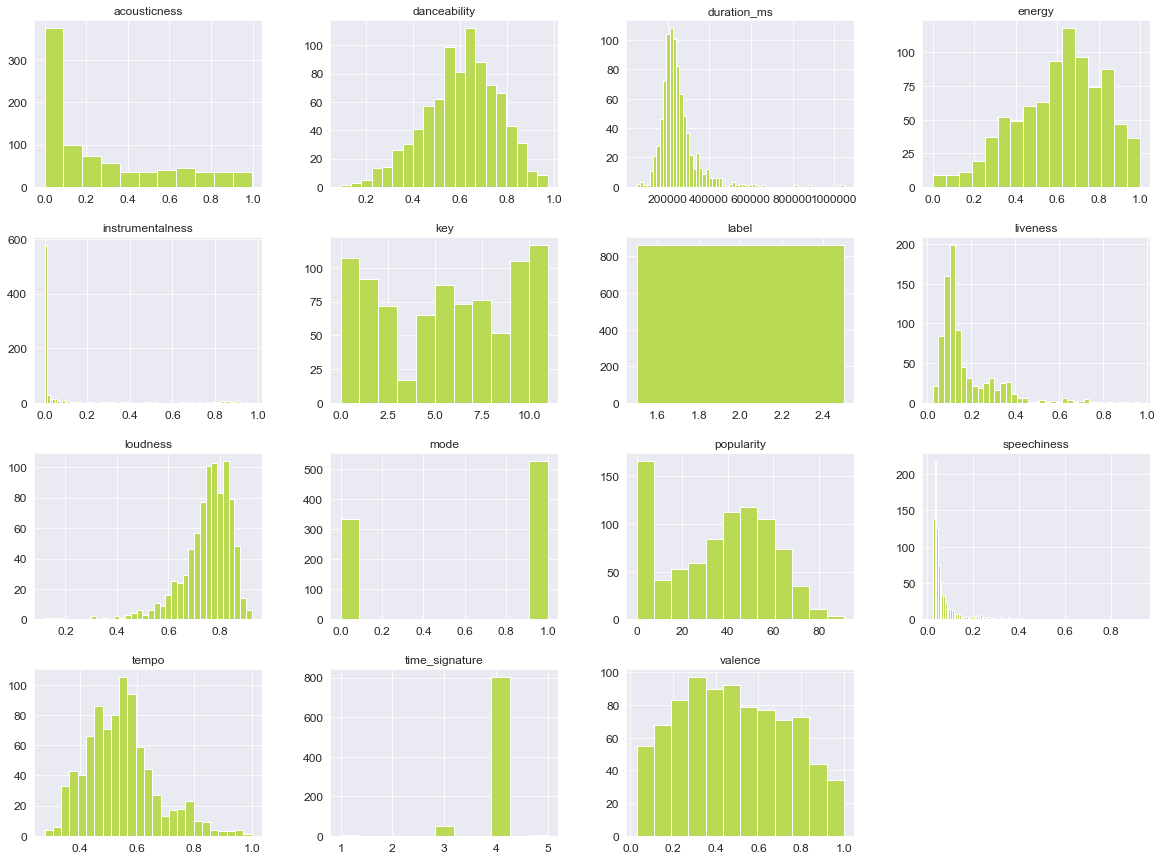

In [310]:
songs[songs['label']==2].hist(bins = 'auto', figsize=(20,15))

In [311]:
songs[songs['label']==3].head(40)

,added_at,name,artist,id,popularity,danceability,energy,loudness,speechiness,acousticness,tempo,liveness,valence,instrumentalness,key,time_signature,mode,duration_ms,label
292,2019-12-12T22:29:04Z,Pomp and Circumstance,Various Artists,6A0mgcjDWaUmuD3WKK9jdA,27,0.329,0.319,0.618764,0.0360,0.901000,0.544023,0.2860,0.4230,0.868000,2,4,1,249600,3
1693,2017-11-13T05:31:55Z,IFFY,Black Kids,721pqMxHXKRdiuByo1zF7d,24,0.719,0.744,0.831762,0.0296,0.036700,0.550840,0.3190,0.8240,0.000000,11,4,0,263533,3
2712,2016-08-18T01:10:26Z,No Diggity,Chet Faker,2xD7RvKFJl52xyds3wQFXQ,56,0.574,0.764,0.840983,0.2280,0.678000,0.740598,0.1160,0.4730,0.000974,2,4,0,221533,3
512,2019-10-17T07:46:30Z,Pompeii,Bastille,3gbBpTdY8lnQwqxNCcf795,69,0.679,0.715,0.799902,0.0407,0.075500,0.589701,0.2710,0.5710,0.000000,9,4,1,214148,3
1184,2018-11-11T02:24:20Z,Chakra Daemon,Foreign Air,2a5GAK77xQ6FJ9tpw3u5Wh,32,0.653,0.561,0.844040,0.0640,0.006350,0.518452,0.0692,0.6860,0.002780,8,4,1,172600,3
2286,2017-01-01T01:16:31Z,When - Live,dodie,5CqXrqDRXfF5jNVwT0nmPF,50,0.308,0.179,0.630213,0.0332,0.929000,0.336426,0.1080,0.2850,0.004100,8,3,1,195000,3
674,2019-06-25T07:09:49Z,Deadly Valentine,Charlotte Gainsbourg,0pfTlQJBOV4LUmF8qqrVy5,54,0.461,0.545,0.753717,0.0460,0.029700,0.485745,0.0928,0.4080,0.047100,11,4,1,364987,3
661,2019-07-27T05:19:35Z,High Steppin',The Avett Brothers,5zXNvJgCNNqmC262XJp8TW,5,0.663,0.649,0.840698,0.1550,0.086200,0.395634,0.0744,0.1210,0.000001,9,4,1,201253,3
2551,2016-10-13T01:09:17Z,That's Alright (Alternate Take),Fleetwood Mac,7oyvsMx8H6zpMGtnsX6bfi,0,0.549,0.385,0.659405,0.0284,0.573000,0.368439,0.1250,0.5560,0.000000,7,4,1,187560,3
2759,2013-11-09T23:10:32Z,Heat Division,Dauwd,45bDwsLAz8UXEgW9mdDS9T,0,0.760,0.693,0.742579,0.0507,0.189000,0.587480,0.0902,0.0899,0.890000,1,4,1,383104,3


In [312]:
songs[songs['label']==3].mean()

popularity              35.735537
danceability             0.583419
energy                   0.607740
loudness                 0.748277
speechiness              0.073976
acousticness             0.272811
tempo                    0.547911
liveness                 0.193672
valence                  0.448090
instrumentalness         0.154375
key                      5.250689
time_signature           3.909091
mode                     0.614325
duration_ms         248914.534435
label                    3.000000
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E945B3C5C8>,
      dtype=object)

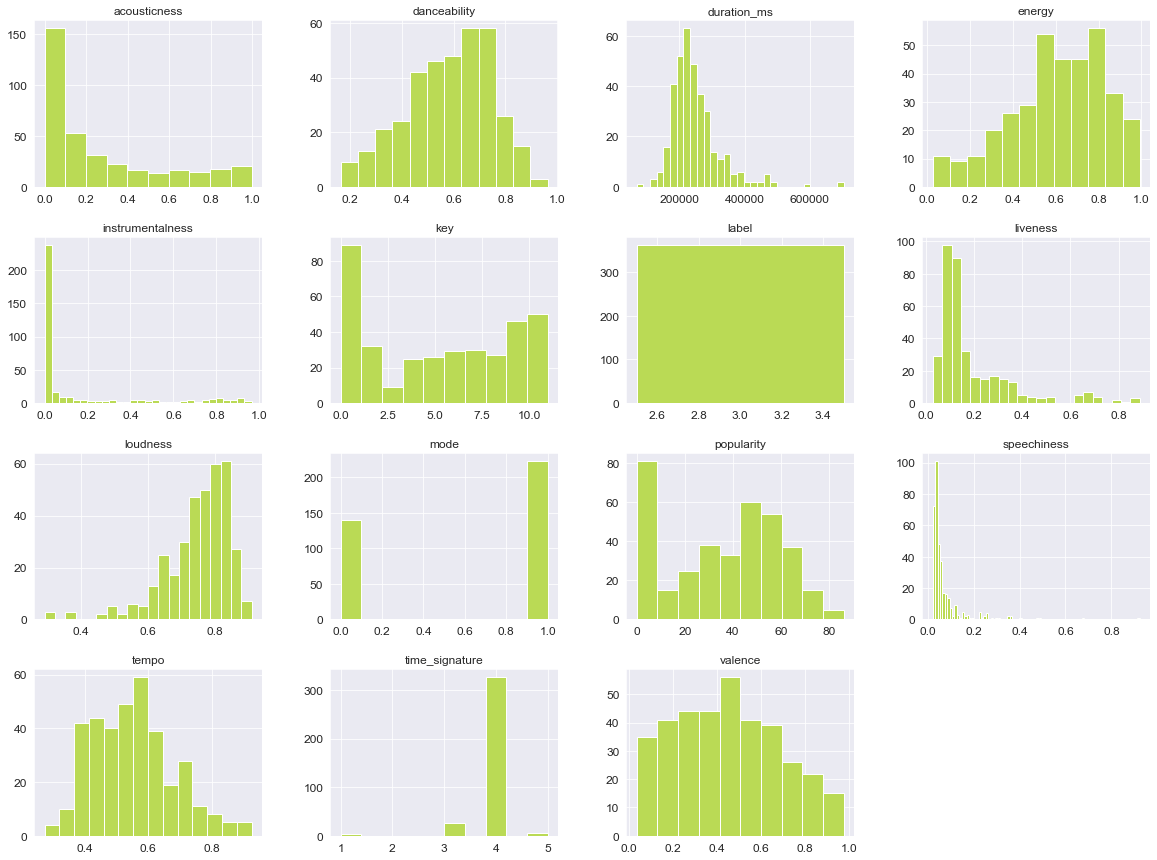

In [313]:
songs[songs['label']==3].hist(bins = 'auto', figsize=(20,15))

In [314]:
songs[songs['label']==4].head(40)

,added_at,name,artist,id,popularity,danceability,energy,loudness,speechiness,acousticness,tempo,liveness,valence,instrumentalness,key,time_signature,mode,duration_ms,label
369,2019-11-27T09:33:47Z,These Days,Molly Miller Trio,3tkXAdOrODstOhyxWz6RE7,3,0.441,0.3760,0.557064,0.0366,0.690000,0.801167,0.0982,0.3850,0.888000,5,4,1,125120,4
2762,2013-11-09T23:10:32Z,Tell Me What You Want (feat. Aya) - Click Clic...,Shiny Objects,12fO5dFlRrAnqfp1lIuI06,0,0.917,0.4420,0.708776,0.0555,0.004920,0.555240,0.1260,0.3860,0.240000,9,4,1,424601,4
2626,2016-09-21T04:24:29Z,Closer,Nine Inch Nails,39tLc4Xp58Lu4KcWHggeE2,12,0.559,0.7250,0.741672,0.0426,0.000365,0.416527,0.1120,0.5010,0.553000,10,4,0,373307,4
1897,2017-07-15T20:45:21Z,Apocalypse,Cigarettes After Sex,3AVrVz5rK8Hrqo9YGiVGN5,61,0.369,0.4670,0.731648,0.0274,0.019400,0.437171,0.1090,0.1740,0.460000,5,4,1,290147,4
57,2020-02-18T16:07:59Z,Dani California,Red Hot Chili Peppers,10Nmj3JCNoMeBQ87uw5j8k,75,0.556,0.9130,0.904108,0.0437,0.019300,0.445088,0.3460,0.7300,0.000009,0,4,1,282160,4
2172,2017-03-20T21:40:19Z,I Could Use a Love Song,Maren Morris,09iyGiljLWRYXdRazFkdtJ,70,0.638,0.6340,0.797544,0.0468,0.214000,0.426176,0.0866,0.4730,0.000000,6,4,1,196422,4
612,2019-08-31T07:51:39Z,Knights of Cydonia,Muse,7ouMYWpwJ422jRcDASZB7P,68,0.366,0.9630,0.827928,0.1420,0.000273,0.634490,0.1150,0.2110,0.012200,11,4,0,366213,4
1155,2018-12-05T23:22:54Z,SkÃ¡pame,Su MercÃ©,5kdQLsd2p3wROA2FHfTC6J,0,0.637,0.6810,0.784049,0.0377,0.270000,0.476786,0.1170,0.7830,0.000026,7,4,0,294173,4
2534,2016-10-13T01:09:17Z,Lifeâs What You Make It,Placebo,4YCyV3fpuj82g1lUlMqD2b,25,0.465,0.9360,0.825804,0.0798,0.000527,0.434885,0.3510,0.3300,0.000591,1,4,1,318383,4
1652,2017-12-02T08:49:31Z,Dirty Sexy Money (feat. Charli XCX & French Mo...,David Guetta,0Q0WJJWeLi0foXzW0K87Tr,27,0.646,0.7660,0.788375,0.1940,0.092500,0.740543,0.1300,0.6590,0.000005,1,4,1,180187,4


In [315]:
songs[songs['label']==4].mean()

popularity              37.043860
danceability             0.556084
energy                   0.603990
loudness                 0.736589
speechiness              0.064416
acousticness             0.294262
tempo                    0.555368
liveness                 0.169836
valence                  0.481170
instrumentalness         0.127266
key                      5.447368
time_signature           3.868421
mode                     0.640351
duration_ms         242210.105263
label                    4.000000
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E9475C1FC8>,
      dtype=object)

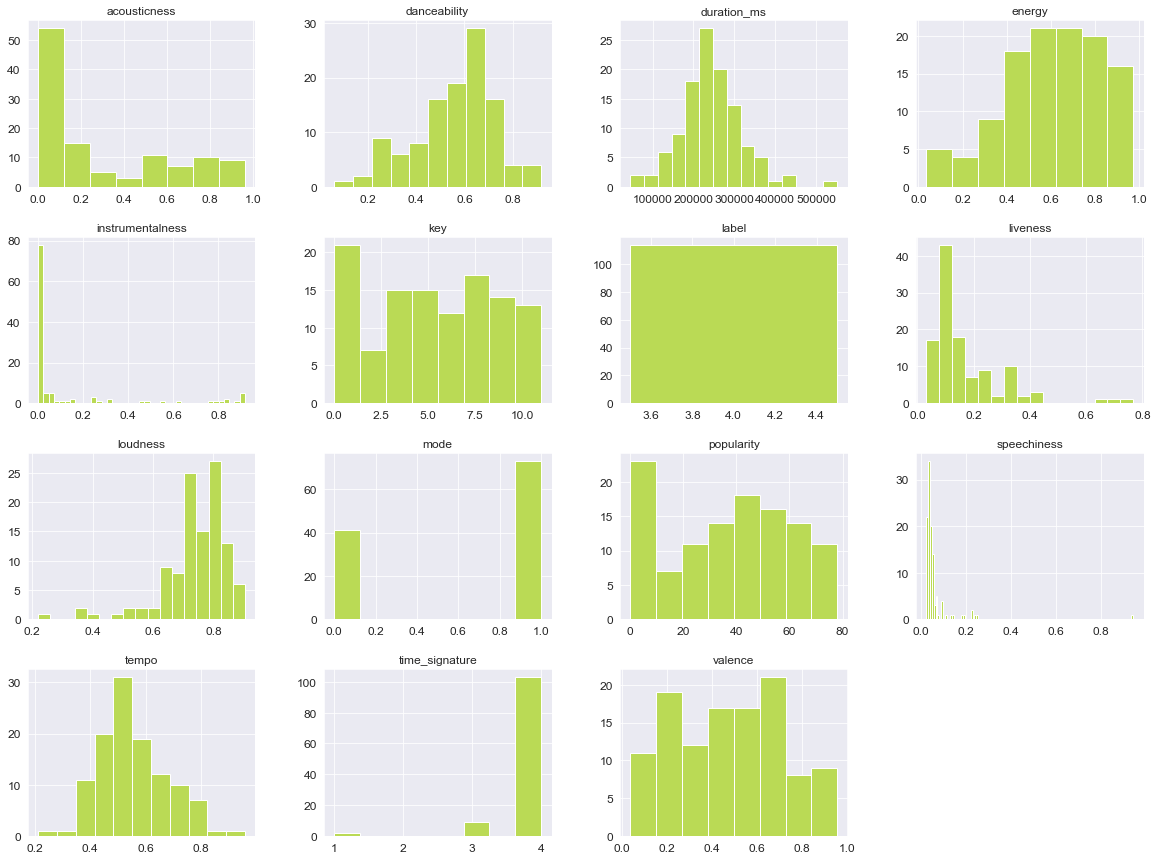

In [316]:
songs[songs['label']==4].hist(bins = 'auto', figsize=(20,15))

In [317]:
songs[songs['label']==5].head(40)

,added_at,name,artist,id,popularity,danceability,energy,loudness,speechiness,acousticness,tempo,liveness,valence,instrumentalness,key,time_signature,mode,duration_ms,label
173,2020-01-23T01:24:23Z,Wanted,OneRepublic,6hLkeOMrhZ2CMLBp2of576,72,0.668,0.534,0.794643,0.0677,0.164000,0.674759,0.1000,0.7110,0.000000,1,4,1,136248,5
331,2019-11-27T09:33:47Z,Champipple,John Popper & The Duskray Troubadours,6TdoDstYM40wBaBmIzArij,22,0.726,0.584,0.741802,0.0323,0.617000,0.435037,0.1110,0.9200,0.000000,0,4,1,255987,5
2497,2016-11-08T04:25:36Z,Fall Creek Boys Choir,James Blake,4ldAHJkji64Ke0WlxL9fj9,44,0.556,0.269,0.648345,0.0502,0.946000,0.462293,0.0834,0.1730,0.004920,5,4,1,273693,5
1386,2018-04-05T05:54:32Z,Me & You â,HONNE,2mDeWOqdFJLV2zsrTCPG0T,51,0.769,0.546,0.751023,0.0387,0.645000,0.556314,0.0948,0.6030,0.000231,0,4,0,243601,5
896,2019-04-08T03:58:26Z,A Still Heart,The Naked And Famous,452IDnh4AkEAiiH23NwFvo,0,0.221,0.311,0.689711,0.0384,0.914000,0.414130,0.0782,0.1090,0.033400,0,4,1,230067,5
293,2019-12-12T22:29:04Z,I'll Believe In Anything,Wolf Parade,6JNmQSxi6HOzOozEQMsbxp,51,0.308,0.942,0.847796,0.1160,0.398000,0.666647,0.0494,0.1480,0.000000,0,3,1,276613,5
2201,2017-03-10T08:30:22Z,Dress,Sylvan Esso,3cBV8V9zlYNraydyF8NpBY,46,0.672,0.578,0.801741,0.2290,0.857000,0.647637,0.1050,0.1600,0.000148,5,4,0,229840,5
2435,2016-11-20T11:57:51Z,Say It (feat. Tove Lo) [SG Lewis Remix],Flume,1sG601xf9rWPu6LQyTG54c,0,0.605,0.501,0.771227,0.0429,0.031800,0.694180,0.2080,0.1030,0.350000,11,4,0,297600,5
458,2019-10-14T08:47:42Z,Do It Again,Steely Dan,2BstRQGodshjGpeDGQiNgo,68,0.682,0.537,0.699632,0.0323,0.218000,0.576462,0.0556,0.9630,0.000031,2,4,0,356733,5
665,2019-07-27T05:19:35Z,Piece of My Heart,Big Brother & The Holding Company,1xKQbqQtQWrtQS47fUJBtl,66,0.443,0.727,0.759286,0.1450,0.263000,0.744189,0.1690,0.5660,0.000141,4,4,1,253333,5


In [318]:
songs[songs['label']==5].mean()

popularity              37.038288
danceability             0.593173
energy                   0.611308
loudness                 0.747200
speechiness              0.076399
acousticness             0.278717
tempo                    0.554311
liveness                 0.180019
valence                  0.469234
instrumentalness         0.125668
key                      5.207207
time_signature           3.927928
mode                     0.635135
duration_ms         248998.368243
label                    5.000000
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E94822BB08>,
      dtype=object)

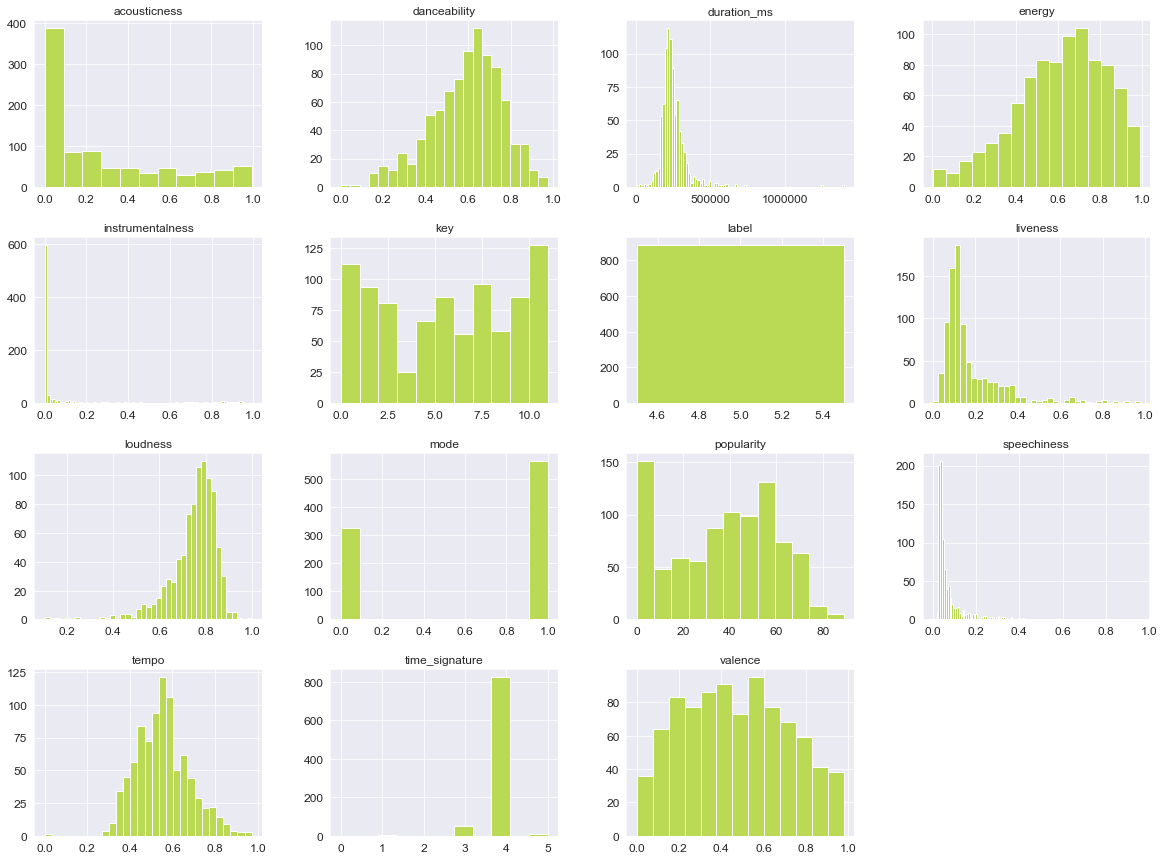

In [319]:
songs[songs['label']==5].hist(bins = 'auto', figsize=(20,15))

# Confusion Matrices and Supervised Machine Learning
We've completed our exploration. Now let's print out some confusion matrics and use some supervised machine learning techniques to test how accurate each method is with predicting the label that should be assigned to any given song from the K-Means clustering technique we used earlier.<br>
<br>
Below we will split our data into a training set and a test set. This is a cornerstone step in practical data analysis and is a good habit to retain. For this dataset, we will train 2/3's of our data, and then test the other 1/3 to see how accurate different kinds of supervised machine learning techniques are at predicting the label that our test songs should be labeled.<br>
<br>
We will run our test set against the following supervised machine learning methods:
- Random Forest
- K-Nearest Neighbor (KNN)
- Multi-layer Perceptron classifier (MLP Classifier)
- Suppert Vector Machine (SVM)

# Random Forest

In [326]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels

X = songs_features
y = y_kmeans

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [172]:
# Predicting the Test set results
y_pred = rfc.predict(X_test)

In [173]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[278   7   0   0   1   0]
 [ 11 280   2   0   0   0]
 [  3   4 133   0   0   0]
 [  0   0   0  40   0   0]
 [  1   0   1   0  93   0]
 [  0   0   3   1   0 105]]


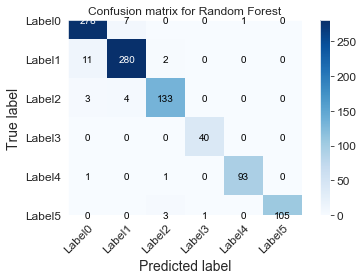

In [181]:
# Confusion matrix
definitions = ['Label0','Label1','Label2','Label3','Label4','Label5']
# reversefactor = dict(zip(range(4),definitions))
# actual = np.vectorize(reversefactor.get)(y_test)
# pred = np.vectorize(reversefactor.get)(y_pred)
# print(pd.crosstab(actual, pred, rownames=['Actual Mood'], colnames=['Predicted Mood']))

plot_confusion_matrix(y_test, y_pred, classes=definitions,
                      title='Confusion matrix for Random Forest')

Random Forest has a neat "feature importance" function. We can use this to see the most important value across all songs in our dataset for each song feature.

In [182]:
# View a list of the features and their importance scores
features = songs_features.columns
list(zip(songs_features[features], rfc.feature_importances_))

[('danceability', 0.05566872806392931),
 ('energy', 0.09537419909770904),
 ('loudness', 0.04262862592540562),
 ('speechiness', 0.01668980497823807),
 ('acousticness', 0.24938877989317207),
 ('tempo', 0.01688986165908746),
 ('liveness', 0.015611457560063505),
 ('valence', 0.3122296970730627),
 ('instrumentalness', 0.19551884574933232)]

# K-Nearest Neighbor (KNN)

In [184]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
# Train the model using the training sets
knn.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [185]:
knn_pred = knn.predict(X_test)

Confusion matrix, without normalization
[[266  18   1   0   1   0]
 [ 16 273   3   0   1   0]
 [  3   9 123   0   0   5]
 [  0   0   1  38   0   1]
 [  2   0   1   2  90   0]
 [  3   0   6   0   0 100]]


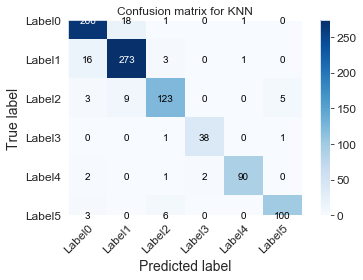

In [186]:
plot_confusion_matrix(y_test, knn_pred, classes=definitions,
                      title='Confusion matrix for KNN')

# Support Vector Machines (SVM)

In [187]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
svm = svm.SVC(kernel="linear") 

#Train the model using the training sets
svm.fit(X_train, y_train)

#Predict the response for test dataset
svm_pred = svm.predict(X_test)

Confusion matrix, without normalization
[[286   0   0   0   0   0]
 [  5 288   0   0   0   0]
 [  2   5 131   0   2   0]
 [  0   0   0  40   0   0]
 [  0   0   0   0  95   0]
 [  1   0   0   1   0 107]]


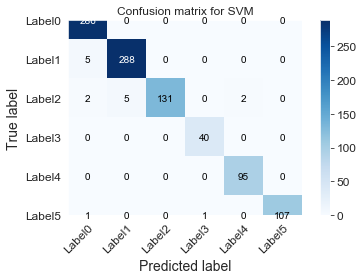

In [188]:
plot_confusion_matrix(y_test, svm_pred, classes=definitions,
                      title='Confusion matrix for SVM')

# Multi-layer Perceptron classifier (MLP Classifier)

In [189]:
from sklearn.neural_network import MLPClassifier

In [190]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

C:\Users\My Computer\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [191]:
mlp_pred = mlp.predict(X_test)

Confusion matrix, without normalization
[[282   4   0   0   0   0]
 [  8 284   0   0   1   0]
 [  0   2 138   0   0   0]
 [  0   0   0  40   0   0]
 [  0   0   1   0  94   0]
 [  0   0   2   1   0 106]]


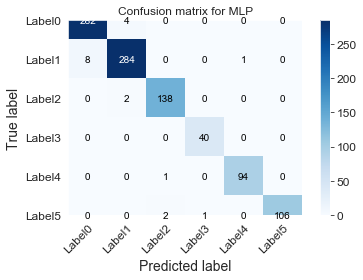

In [192]:
plot_confusion_matrix(y_test, mlp_pred, classes=definitions,
                      title='Confusion matrix for MLP')

# Conclusion
Below we can see a printout of classification reports for the four machine learning models that we used in our analysis. Bearing in mind that the K-Means method of choice for clustering, we can see that SVM and MLP returned the highest precision, recall, and f1 averages when making predictions against our test data.

In [270]:
print(classification_report(y_test,y_pred,target_names=definitions)+'forest')

              precision    recall  f1-score   support

      Label0       0.95      0.97      0.96       286
      Label1       0.96      0.96      0.96       293
      Label2       0.96      0.95      0.95       140
      Label3       0.98      1.00      0.99        40
      Label4       0.99      0.98      0.98        95
      Label5       1.00      0.96      0.98       109

    accuracy                           0.96       963
   macro avg       0.97      0.97      0.97       963
weighted avg       0.96      0.96      0.96       963
forest


In [271]:
print(classification_report(y_test,knn_pred,target_names=definitions)+'KNN')

              precision    recall  f1-score   support

      Label0       0.92      0.93      0.92       286
      Label1       0.91      0.93      0.92       293
      Label2       0.91      0.88      0.89       140
      Label3       0.95      0.95      0.95        40
      Label4       0.98      0.95      0.96        95
      Label5       0.94      0.92      0.93       109

    accuracy                           0.92       963
   macro avg       0.94      0.93      0.93       963
weighted avg       0.92      0.92      0.92       963
KNN


In [272]:
print(classification_report(y_test,svm_pred,target_names=definitions)+'SVM')

              precision    recall  f1-score   support

      Label0       0.97      1.00      0.99       286
      Label1       0.98      0.98      0.98       293
      Label2       1.00      0.94      0.97       140
      Label3       0.98      1.00      0.99        40
      Label4       0.98      1.00      0.99        95
      Label5       1.00      0.98      0.99       109

    accuracy                           0.98       963
   macro avg       0.99      0.98      0.98       963
weighted avg       0.98      0.98      0.98       963
SVM


In [273]:
print(classification_report(y_test,mlp_pred,target_names=definitions)+'MLP')

              precision    recall  f1-score   support

      Label0       0.97      0.99      0.98       286
      Label1       0.98      0.97      0.97       293
      Label2       0.98      0.99      0.98       140
      Label3       0.98      1.00      0.99        40
      Label4       0.99      0.99      0.99        95
      Label5       1.00      0.97      0.99       109

    accuracy                           0.98       963
   macro avg       0.98      0.98      0.98       963
weighted avg       0.98      0.98      0.98       963
MLP
